# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

Поставим двойстевенную задачу к данной.  

Определим $g(\lambda) = inf_{y \in C} L(y, \lambda) = inf_{y \in C} \ ||x - y||^{2} + 2\lambda||y||_{1} - 2\lambda$  

Найдем минимум лагранжина.

$L = \sum_{i = 1}^{n} \ [(x_{i} - y_{i})^2 + 2\lambda|y|_{i}] - 2\lambda$ 


$L = \sum_{i = 1}^{n} \ g_{i} - 2\lambda$ 

$g_{i} = (x_{i} - y_{i})^2 + 2\lambda|y|_{i}$ 

$\partial g_{i} = 2(x_{i} - y_{i}) + 2\lambda  \partial|y|_{i}$ 

\begin{equation}  
    \partial g_{i} = \begin{cases}  
    2(y_{i} - x_{i}) + 2\lambda, & y_{i} > 0 \\ 
    2(y_{i} - x_{i}) - 2\lambda, & y_{i} < 0 \\
    2(y_{i} - x_{i}) + 2\lambda [-1, 1], & y_{i} = 0 
   \end{cases} 
\end{equation} 

Из критерия, о минимуме, получаем что $0 \in \partial g_{i}$

Следовательно, получаем, что оптимальный y_{i}  

\begin{equation}  
    y_{i} = \begin{cases}  
    x_{i} - \lambda, & x_{i} > \lambda  \\ 
    x_{i} + \lambda, & x_{i} < -\lambda \\ 
    0, & -\lambda \leq x_{i} \leq \lambda 
   \end{cases} 
\end{equation}  



Подставляем обратно в $g_{i}$, получаем:  
\begin{equation}  
    g_{i} = \begin{cases}  
    -(\lambda - |x_{i}|)^2 + x_{i}^2 & |x_{i}| > \lambda \\
    x_{i}^2 & |x_{i}| \leq \lambda
   \end{cases} 
\end{equation}  

Ну то есть теперь понятно чему равно $g(\lambda)$ 

Теперь мы готовы поставить двойственную задачу: 
\begin{equation}  
    maximize \ g(\lambda) \\ 
    subject \ to \ \lambda \geq 0
\end{equation} 

Сразу отметим, что в исходной задаче оптимизации, если $x \in C$, то $y = x$ и $proj(x) = x$   

Допустим это не так. Решим задачу, когда $||x||_{1} > 1$. Сразу отметим, что условие Слейтера выполняется, то есть найдется такой $||y||_{1} < 1$. То есть получаем, что решение двойственной задачи совпдает с исходной.   



Посчитаем теперь производную $g_{i}$ по $\lambda$. 
\begin{equation} 
g_{i}'(\lambda) = \begin{cases}
2(|x_{i}| - \lambda) &  |x_{i}| \geq \lambda \\ 
0 & |x_{i}| \leq \lambda
\end{cases}
\end{equation}

\begin{equation} 
     g'(\lambda) = 2\sum_{i}^{n}max(|x_{i}| - \lambda, 0) - 2
\end{equation}  

Отсопртируем все $x_{i}$, так что: 

\begin{equation}  
    |x_{1}| < |x_{2}| < ... < |x_{n}|
\end{equation}

Поэтому, мы ищем такой $\lambda$, что $g'(x_{i}) \geq 0 \ and \ g'(x_{i + 1}) \leq 0$   

Такой найдется, так как мы сначала договрились, что $||x||_{1} \geq 1$ и ясно, что функция $g'(\lambda)$ убывает 

Оптимальный $\lambda$ есть, 

\begin{equation} 
    \lambda = \frac{\sum_{j = i + 1}^{n} x_{j} - 1}{n - i}
\end{equation} 

Подставим этот  $\lambda$ в $y(\lambda)$, получим: 

\begin{equation}  
    y_{i} = \begin{cases}  
    x_{i} - \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}, & x_{i} > \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}  \\ 
    x_{i} + \frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i}, & x_{i} < -\frac{\sum_{j = i + 1}^{n} |x_{j}| - 1}{n - i} \\ 
    0, & -\lambda \leq x_{i} \leq \lambda 
   \end{cases} 
\end{equation}  

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

Допустим $x \notin C$, ну тогда получается, что $prox_{\lambda\mathbb{I}_C}(x) = \cfrac{1}{2}||x - y||^2 + \infty$, что не сходится с реальностью. 

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

Функцию ошибки обозначим за $Q$.Тогда задача ставится, как $ min_{\omega} Q = min_{omega}||X\omega - y||^{2} $ 

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [1]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [2]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape 

In [3]:
print(y.shape[0]) 
print("сolumns:", X.shape[1]) 

8124
сolumns: 112


Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [4]:
import numpy as np  
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

 $\nabla Q = 2X^T(X\omega - y)$, 
 
Константа Липшица по определению градиентов 

$||\nabla Q(\omega_{1}) - \nabla Q(\omega_{2})|| \leq L||\omega_{1} - \omega_{2}||$ 

Значит $L = sup_{\omega} \cfrac{||\nabla Q(\omega_{1}) - \nabla Q(\omega_{2})||}{||\omega_{1} - \omega_{2}||}= sup_{\omega} \cfrac{||2X^TX(\omega_{1} - \omega_{2}||}{||\omega_{1} - \omega_{2}||}$ 

Или можно оценить максимальное собственное значение матрицы $2X^TX$

In [5]:
from numpy import linalg  

w, v = np.linalg.eig(2 * X.T @ X) 
print('L is equal to', max(w)) 
print('Mu is equal to', min(w)) 
L = max(w)

L is equal to (168083.2354899167+0j)
Mu is equal to (-9.104614230247668e-13+0j)


Отсюда видно, что задача выпуклая, т.к L > 0, но не является сильно выпуклой, т.к $\mu \sim$ 0

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [6]:
class GradientDescent: 
    def __init__(self, max_iter=10000, alpha =1e-3, epsilon=1e-4): 
        self.max_steps = max_iter
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False
    
    def grad(self, w):
        return 2 * np.dot(X.T, (np.dot(X, w) - y))   

    def fit(self, X, y):  
        self.w = np.random.normal(loc=100, size=(X.shape[1])) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):  
            new_w = self.w - self.alpha * self.grad(self.w) 
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w  
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [7]:
gd = GradientDescent(100000, 1/L)  
gd.fit(X_train, y_train)   

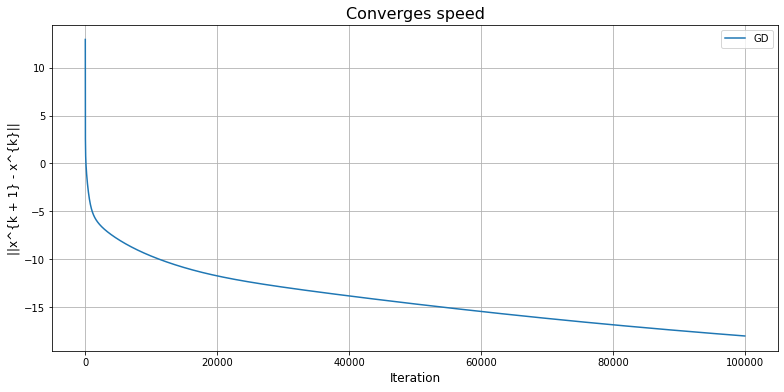

In [8]:
import matplotlib.pyplot as plt   
plt.figure(figsize=(13, 6)) 
plt.plot(range(len(gd.converges_history)), np.log(gd.converges_history), label='GD') 
plt.title('Converges speed', fontsize=16) 
plt.legend() 
plt.xlabel('Iteration', fontsize=12) 
plt.ylabel('||x^{k + 1} - x^{k}||', fontsize=12) 
plt.grid()
plt.show()

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [9]:
y_predicted = gd.predict(X_test)  
print(gd.accuracy(y_predicted, y_test))

0.9993846153846154


In [10]:
accuracy_history = []  
for i in range(100, len(gd.w_history), 100): 
    y_pred = np.dot(X_test, gd.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

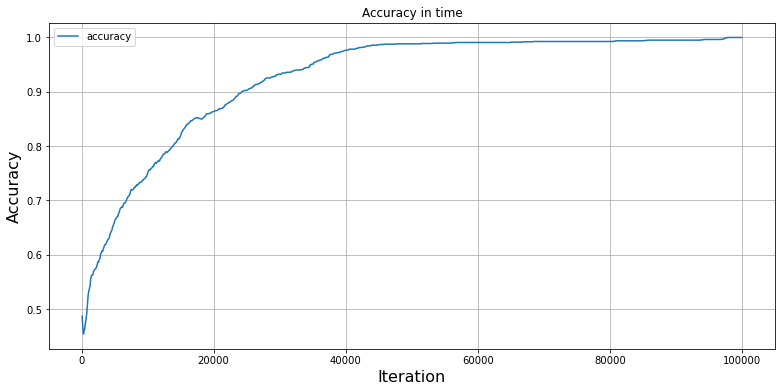

In [11]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(100, len(gd.w_history), 100), accuracy_history, label='accuracy') 
plt.title('Accuracy in time') 
plt.legend() 
plt.xlabel('Iteration', fontsize=16) 
plt.ylabel('Accuracy', fontsize=16) 
plt.grid() 
plt.show()

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

In [12]:
#на вход вектор и радиус шара  
def projl1(x, r):   
    s = 0
    for i in range(x.shape[0]): 
        s += np.absolute(x[i]) 
    if(s <= 1): 
        return x  
    
    x_sorted = np.sort(np.absolute(x)) 
    g_derivative = np.zeros(x.shape[0] + 1)   
    
    sum_x_sorted = np.sum(np.absolute(x_sorted)) 
    cur_sum = 0 
    g_derivative[0] = sum_x_sorted - r
    for i in range(x_sorted.shape[0]): 
        g_derivative[i + 1] = ((i + 1) - x.shape[0]) * np.absolute(x_sorted[i]) + sum_x_sorted - (cur_sum + np.absolute(x_sorted[i])) - r 
        cur_sum += np.absolute(x_sorted[i]) 
    
    k = -1
    for i in range(1, g_derivative.shape[0], 1): 
        if(g_derivative[i - 1] >= 0 and g_derivative[i] <= 0): 
            k = i - 1   
            break 
    
    cur_sum = 0
    for i in range(k, x_sorted.shape[0], 1): 
        cur_sum += np.absolute(x_sorted[i])    
    
    optimal = (cur_sum - r) / (x_sorted.shape[0] - k) 
    
    result_projection = np.zeros(x.shape[0]) 
    for i in range(result_projection.shape[0]): 
        if(x[i] > optimal): 
            result_projection[i] = x[i] - optimal 
        elif(x[i] < -optimal): 
            result_projection[i] = x[i] + optimal 
        else: 
            result_projection[i] = 0  
    return result_projection 

In [13]:
x = np.array([0.7, -0.6, -0.2, -1])
r = 1 
print(projl1(x, r))  

[ 0.26666667 -0.16666667  0.         -0.56666667]


In [14]:
class GradientDescentProjection: 
    def __init__(self, max_iter=10000, alpha =1e-3, epsilon=1e-4, l = 1): 
        self.max_steps = max_iter 
        self.l = l
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False
    
    def grad(self, w):
        return 2 * np.dot(X.T, (np.dot(X, w) - y))   

    def fit(self, X, y):  
        self.w = np.random.normal(loc=100, size=(X.shape[1])) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):  
            new_w = projl1(self.w - self.alpha * self.grad(self.w), self.l)
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w  
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [15]:
gd2 = GradientDescentProjection(10000, 1/L, epsilon=1e-4, l=10)  
gd2.fit(X_train, y_train) 

/tmp/ipykernel_1140347/210479997.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  result_projection[i] = x[i] - optimal
/tmp/ipykernel_1140347/210479997.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  result_projection[i] = x[i] + optimal


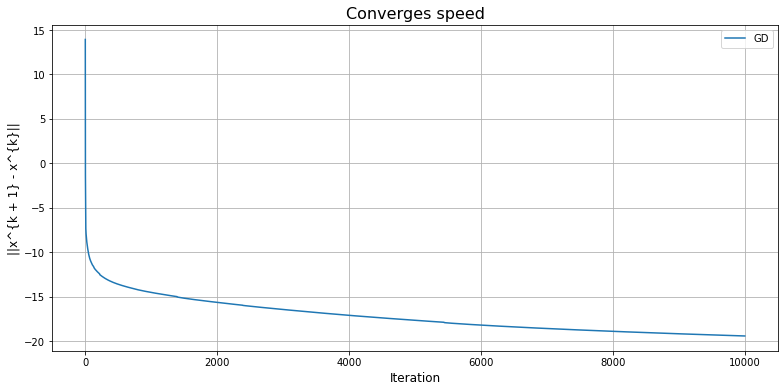

In [16]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(len(gd2.converges_history)), np.log(gd2.converges_history), label='GD') 
plt.title('Converges speed', fontsize=16) 
plt.legend() 
plt.xlabel('Iteration', fontsize=12) 
plt.ylabel('||x^{k + 1} - x^{k}||', fontsize=12) 
plt.grid()
plt.show() 

In [17]:
y_predicted = gd2.predict(X_test)  
print(gd2.accuracy(y_predicted, y_test)) 

0.9993846153846154


In [18]:
accuracy_history = []  
for i in range(100, len(gd2.w_history), 100): 
    y_pred = np.dot(X_test, gd2.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

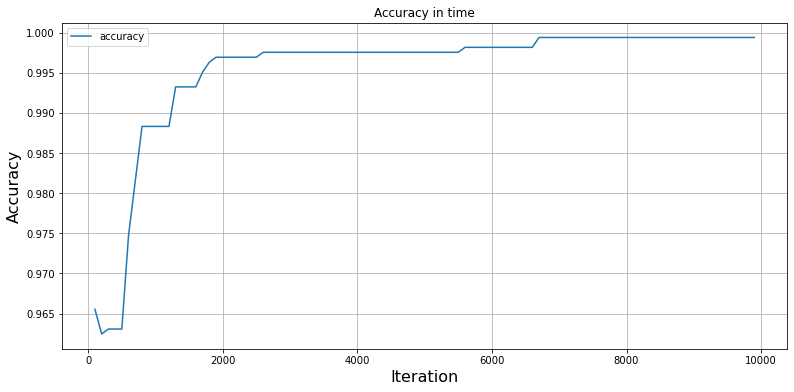

In [19]:
plt.figure(figsize=(13, 6)) 
plt.plot(range(100, len(gd2.w_history), 100), accuracy_history, label='accuracy') 
plt.title('Accuracy in time') 
plt.legend() 
plt.xlabel('Iteration', fontsize=16) 
plt.ylabel('Accuracy', fontsize=16) 
plt.grid() 
plt.show()

Чем больше радиус шара, тем лучше точность, но тем дольше работает алгоритм, в итоге вынуждены искать баланс, между скоростью и качеством. 

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

$l_2$ регуляризация не портит нам ровным счетом, ничего, чуть меньше станет оптимальный лернинг рейт, но в целом мы все также продолжим сходиться. А если $l_1$, то возникает небольшая проблема в нуле, которую можно обойти, начав считать, что производная в нуле 0 или еще какое-то значение принадлежащее субградиенту в нуле, а можно возпользоваться проксимальным методом, тем самым превратив задачу из выпуклой в сильно выпуклую, тем самым давая методу лучшую сходимость, a также обходом зануления производной, что сильно улучшает сходимость. 

Наш шаг выглядит так: 
    $$w_{k + 1} = prox_{\alpha\lambda ||w||_{1}}(w_{k} - \alpha \nabla Q({w_{k}}))$$

$$prox_{\alpha\lambda ||w||_{1}}(w_{k} - \alpha \nabla Q(x_{k})) = argmin_{u} \ \lambda||u||_{1} + \cfrac{1}{2\alpha} ||u - w_{k} + \alpha \nabla Q(w_{k})||_{2}^{2}$$

Решая несложную задачу, можно получить, что: 

\begin{equation*}
prox_{\alpha \lambda||w||_{1}}(w^{k} - \alpha \nabla f(w^{k}))_{i} = 
 \begin{cases}
   w^{k}_{i} - \alpha \nabla f(x^{k}_{i}) - \lambda \alpha, & w^{k}_{i} - \alpha \nabla f(w^{k}_{i}) >\alpha \lambda\\
   0, & |w^{k}_{i} - \alpha \nabla f(w^{k}_{i})| \leq \alpha \lambda \\ 
   w^{k}_{i} - \alpha \nabla f(x^{k}_{i}) +  \lambda \alpha, & w^{k}_{i} - \alpha \nabla f(x^{k}_{i}) < -\alpha \lambda
 \end{cases}
\end{equation*}

In [30]:
import time 

In [31]:
def grad_l2(X, y, w, reg): 
    return 2 * np.dot(X.T, np.dot(X, w) - y) + 2 * reg * w

In [32]:
def grad(X, y, w): 
    return 2 * np.dot(X.T, np.dot(X, w) - y)

In [33]:
def grad_l1(X, y, w, reg):  
    adding = np.zeros(X.shape[1])
    for i in range(X.shape[1]): 
        if(w[i] > 0): 
            adding[i] = reg 
        elif(w[i] < 0): 
            adding[i] = -reg 
        else: 
            adding[i] = 0 
    return 2 * np.dot(X.T, np.dot(X, w) - y) + adding

In [34]:
def prox(g, w, alpha, reg):  
    new_w = np.zeros(w.shape[0])
    for i in range(w.shape[0]):  
        if(w[i] - alpha * g[i] > reg * alpha): 
            new_w[i] = w[i] - alpha * g[i] - reg * alpha 
        elif(w[i] - alpha * g[i] < -reg * alpha): 
            new_w[i] = w[i] - alpha * g[i] + reg * alpha 
        else: 
            new_w[i] = 0
    return new_w

In [35]:
class l1Regularization: 
    def __init__(self, reg, max_iter=10000, alpha =1e-3, epsilon=1e-4): 
        self.max_steps = max_iter
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False 
        self.reg = reg 
        self.time_history = []

    def fit(self, X, y):  
        time_start = time.time() 
        self.w = np.ones(X.shape[1]) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):   
            g = grad(X, y, self.w) 
            new_w = prox(g, self.w, self.alpha, self.reg)
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)   
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w   
            self.time_history.append(time.time() - time_start)
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [36]:
class l2Regularization: 
    def __init__(self, reg, max_iter=10000, alpha =1e-3, epsilon=1e-4): 
        self.max_steps = max_iter
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False 
        self.reg = reg 
        self.time_history = []

    def fit(self, X, y):   
        time_start = time.time() 
        self.w = np.ones(X.shape[1]) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):   
            g = grad_l2(X, y, self.w, self.reg) 
            new_w = self.w - self.alpha * g
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w 
            self.time_history.append(time.time() - time_start)
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [198]:
l1 = l1Regularization(L/1000, 10**4, 1/(L)) 
l2 = l2Regularization(L/1000, 10**4, 1/(L + L/1000))

In [199]:
class l0Regularization: 
    def __init__(self, reg, max_iter=10000, alpha =1e-3, epsilon=1e-4): 
        self.max_steps = max_iter
        self.alpha = alpha
        self.w = None 
        self.converges_history = [] 
        self.epsilon = epsilon  
        self.w_history = []
        self.converge = False 
        self.reg = reg

    def fit(self, X, y):  
        self.w = np.ones(X.shape[1]) 
        new_w = np.zeros(X.shape[1])
        for i in range(self.max_steps):   
            g = grad_l1(X, y, self.w, self.reg) 
            new_w = self.w - self.alpha * g
            self.converges_history.append(np.linalg.norm(self.w - new_w)**2)  
            self.w_history.append(new_w)
            if(np.linalg.norm(self.w - new_w)**2 < 1e-4): 
                self.converge = True
            self.w = new_w  
        return self  

    def predict(self, X): 
        y_predicted = np.dot(X, self.w)   
        for i in range(len(y_predicted)): 
            if(np.absolute(y_predicted[i] - 1) <= np.absolute(y_predicted[i] - 2)): 
                y_predicted[i] = 1 
            else: 
                y_predicted[i] = 2  
        return y_predicted 
        
    def accuracy(self, y_predicted, y_test): 
        return (np.sum(y_predicted == y_test))/(y_test.shape[0]) 

In [200]:
l0 = l0Regularization(L/1000, 10**4, 1/L)

In [201]:
l0.fit(X_train, y_train)

/tmp/ipykernel_96093/440994870.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  adding[i] = reg
/tmp/ipykernel_96093/440994870.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  adding[i] = -reg


In [202]:
l1.fit(X_train, y_train)

/tmp/ipykernel_96093/478700918.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  new_w[i] = w[i] - alpha * g[i] - reg * alpha
/tmp/ipykernel_96093/478700918.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  new_w[i] = w[i] - alpha * g[i] + reg * alpha


In [203]:
l2.fit(X_train, y_train)

In [204]:
l0.fit(X_train, y_train)

/tmp/ipykernel_96093/440994870.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  adding[i] = reg
/tmp/ipykernel_96093/440994870.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  adding[i] = -reg


In [205]:
accuracy_history_l1 = []  
for i in range(100, len(l1.w_history), 100): 
    y_pred = np.dot(X_test, l1.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history_l1.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

In [206]:
accuracy_history_l2 = []  
for i in range(100, len(l2.w_history), 100): 
    y_pred = np.dot(X_test, l2.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history_l2.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

In [207]:
accuracy_history_l0 = []  
for i in range(100, len(l0.w_history), 100): 
    y_pred = np.dot(X_test, l0.w_history[i]) 
    for i in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[i] - 1) <= np.absolute(y_pred[i] - 2)): 
            y_pred[i] = 1 
        else: 
            y_pred[i] = 2
            
    accuracy_history_l0.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

In [20]:
import matplotlib.pyplot as plt 

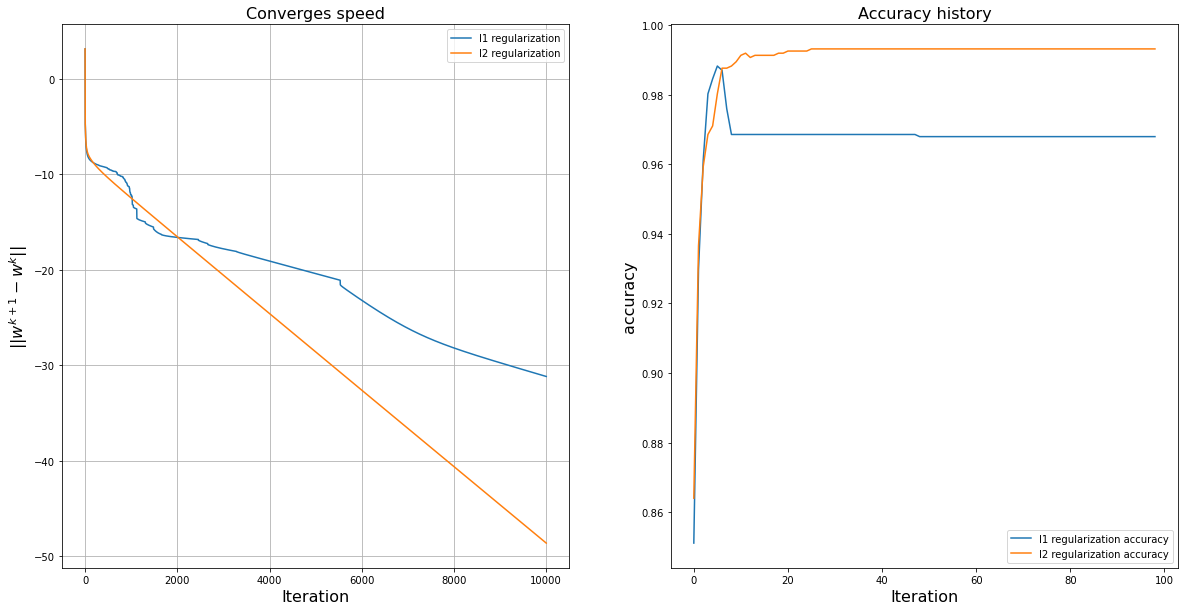

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].plot(range(len(l1.converges_history)), np.log(l1.converges_history), label='l1 regularization')  
ax[0].plot(range(len(l2.converges_history)), np.log(l2.converges_history), label='l2 regularization')  
#ax[0].plot(range(len(l0.converges_history)), np.log(l0.converges_history), label='l0 regularization')  
ax[0].set_title('Converges speed', fontsize=16)  
ax[0].set_xlabel('Iteration', fontsize=16) 
ax[0].set_ylabel(r'$||w^{k + 1} - w^{k}||$', fontsize=16)  
ax[0].legend()
ax[0].grid() 

ax[1].plot(range(len(accuracy_history_l1)), accuracy_history_l1, label='l1 regularization accuracy') 
ax[1].plot(range(len(accuracy_history_l2)), accuracy_history_l2, label='l2 regularization accuracy')  
#ax[1].plot(range(len(accuracy_history_l0)), accuracy_history_l0, label='l0 regularization')  
ax[1].set_title('Accuracy history', fontsize=16)  
ax[1].set_xlabel('Iteration', fontsize=16) 
ax[1].set_ylabel('accuracy', fontsize=16)  
ax[1].legend()

## Здесь сразу видно, что в l2-регуляризации learning rate надо в знаменателе добавлять регулязационную константу. Дает лучшие результаты, т.к, если мы снова распишем градиентный спуск, то увидим, что это слагаемое никуда не ушло. 

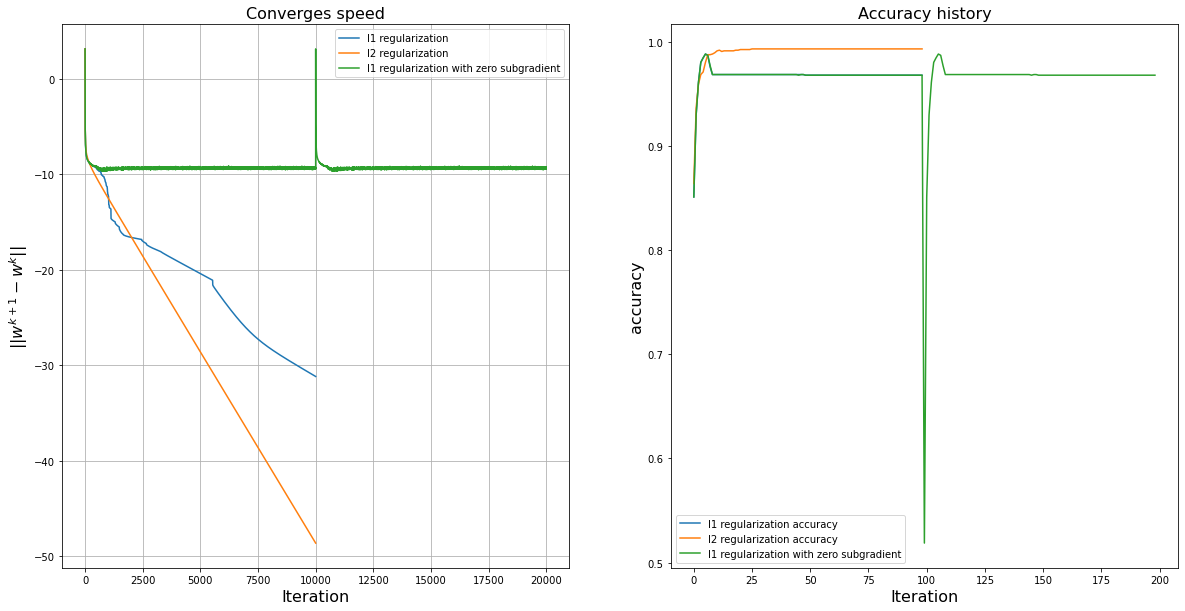

In [210]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].plot(range(len(l1.converges_history)), np.log(l1.converges_history), label='l1 regularization')  
ax[0].plot(range(len(l2.converges_history)), np.log(l2.converges_history), label='l2 regularization')  
ax[0].plot(range(len(l0.converges_history)), np.log(l0.converges_history), label='l1 regularization with zero subgradient')  
ax[0].set_title('Converges speed', fontsize=16)  
ax[0].set_xlabel('Iteration', fontsize=16) 
ax[0].set_ylabel(r'$||w^{k + 1} - w^{k}||$', fontsize=16)  
ax[0].legend()
ax[0].grid() 

ax[1].plot(range(len(accuracy_history_l1)), accuracy_history_l1, label='l1 regularization accuracy') 
ax[1].plot(range(len(accuracy_history_l2)), accuracy_history_l2, label='l2 regularization accuracy')  
ax[1].plot(range(len(accuracy_history_l0)), accuracy_history_l0, label='l1 regularization with zero subgradient')  
ax[1].set_title('Accuracy history', fontsize=16)  
ax[1].set_xlabel('Iteration', fontsize=16) 
ax[1].set_ylabel('accuracy', fontsize=16)  
ax[1].legend()

In [87]:
print(l0.w)

[-5.66354208e-04+0.j -6.02744151e-04+0.j -5.66128938e-04+0.j
 -1.86118263e-04+0.j -2.93287089e-04+0.j  1.25042029e-03+0.j
 -2.89877711e-04+0.j  3.08926197e-04+0.j  8.71348095e-04+0.j
  1.45391064e-04+0.j -6.73289357e-04+0.j -8.78479033e-04+0.j
  7.26823659e-05+0.j  8.30825403e-04+0.j -1.33890968e-04+0.j
 -3.52603087e-04+0.j -1.61113237e-04+0.j -3.06715189e-04+0.j
 -1.49547443e-05+0.j  6.53325492e-04+0.j  3.80628633e-04+0.j
  6.55159013e-04+0.j  3.13542460e-01+0.j  3.75727068e-04+0.j
 -6.21795975e-02+0.j -9.26765397e-04+0.j  3.02391499e-01+0.j
  5.79768405e-01+0.j -1.27121183e-03+0.j  4.43666120e-04+0.j
 -1.10839542e-03+0.j -7.70587536e-04+0.j  1.80637518e-03+0.j
  8.27367591e-04+0.j  4.20842005e-03+0.j  3.00321877e-01+0.j
  7.13910571e-04+0.j  7.54528226e-04+0.j -6.50741677e-04+0.j
 -3.82345775e-04+0.j  2.94620793e-05+0.j  9.85937509e-04+0.j
 -7.92242369e-05+0.j -3.78252635e-06+0.j -3.26866975e-04+0.j
 -8.38710699e-04+0.j -7.04090965e-04+0.j -1.55455223e-04+0.j
  4.07077909e-04+0.j  1.

In [88]:
print(l1.w)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.31518417  0.
 -0.0625286   0.          0.30403035  0.5801847   0.          0.
  0.          0.          0.          0.          0.00421218  0.30119463
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.09931969  0.
  0.          0.          0.01565603  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.04126865  0.          0.          0.          0.          0.
  0.          0.          0.          0.03890527  0.          0.82329888
  0.          0.          0.          0.          0.          0.10779101
  0.          0.02657649  0.          0.          0.          0.
 

In [89]:
print(l2.w)

[ 0.66713341+0.j  0.42406075+0.j  0.44171865+0.j  0.44074604+0.j
  0.61845577+0.j  0.44037452+0.j  0.12321031+0.j  0.11978121+0.j
  0.66561127+0.j  0.12388637+0.j  0.9317733 +0.j  0.63881661+0.j
  0.64677568+0.j  0.63567296+0.j  0.64988473+0.j  0.62331642+0.j
  0.83670208+0.j  0.82286896+0.j  0.62524961+0.j  0.62142879+0.j
 -0.49075821+0.j -0.47675264+0.j  1.16564638+0.j  0.22891446+0.j
  0.63149366+0.j  0.40253915+0.j  1.16563946+0.j  1.00879986+0.j
  0.1719523 +0.j  0.62872107+0.j  0.62878281+0.j -0.40395997+0.j
 -0.56355089+0.j -0.49199751+0.j -0.47551334+0.j -0.44655315+0.j
 -0.52095771+0.j  0.59037414+0.j  0.78470131+0.j  0.78017462+0.j
  0.78055033+0.j  0.78210042+0.j  0.7393719 +0.j  0.7810829 +0.j
  0.78344676+0.j  0.72642641+0.j  0.78121086+0.j  0.78390462+0.j
  0.71914488+0.j -0.54958326+0.j -0.41792759+0.j  0.24967202+0.j
  0.25790102+0.j  0.24125536+0.j  0.28366074+0.j  0.20447444+0.j
  0.26927222+0.j  0.26407128+0.j  0.29467121+0.j  0.40253915+0.j
  0.83037856+0.j  0.83014

## Из данных графиков можно сделать вывод о том, что 

### 1) Заменять градиент в точке 0 нулем, плохая идея, это видно из графиков сходимости, 
### 2) в данном случае l2 регуляризация лучше улавливает зависимости в данных, чем l1 регуляризация. Это может быть связано с тем,  что  l1 регуляризация имеет константный регуляризационный член в градиенте и, тем самым, игнорирует слабые зависимости. 
### 3) Решение через проксимальные методы, оказывается сильно разреженным, намного разреженнее, чем модификация, отмеченная зеленым на графике. 

## Вывод: если в данных есть шум, то лучше всего для сходимости подходит l1 регуляризация, так как она "игнорирует" его

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

У нас есть матрица признаков, мы хотим приближать ее матрицой меньшего ранга(по норме) наилучшим образом, так как она получается меньшей размерности и на ней мы будем быстрее учиться. Существует теорема Эскарта-Янга, которая говорит, что SVD матрицы признаков, является наилучшим приближением по норме. То есть интуитивно, что мы делаем, мы переходим в базис собственных векторов и выбираем те, вдоль которых у нас наименьшая диспересия, то есть они информативнее. Можно построить график измеряющий качество приближения. 

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17105948 0.30230759 0.39600739 0.45841994 0.4986626  0.53641086
 0.56906108 0.59689855 0.62378961 0.6457975 ]


## Перед тем, как использовать PCA данные нужно нормировать, так как на данный момент они имеют разную размерность, поэтому мы можем выбрать не правильные базисные вектора. Проделаем эту процедуру. 

In [55]:
from sklearn import preprocessing  
normalizer = preprocessing.StandardScaler()  
normalizer.fit(X_train)  
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [56]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
#print(X_train_norm)

In [58]:
#print(X_train_norm.shape)

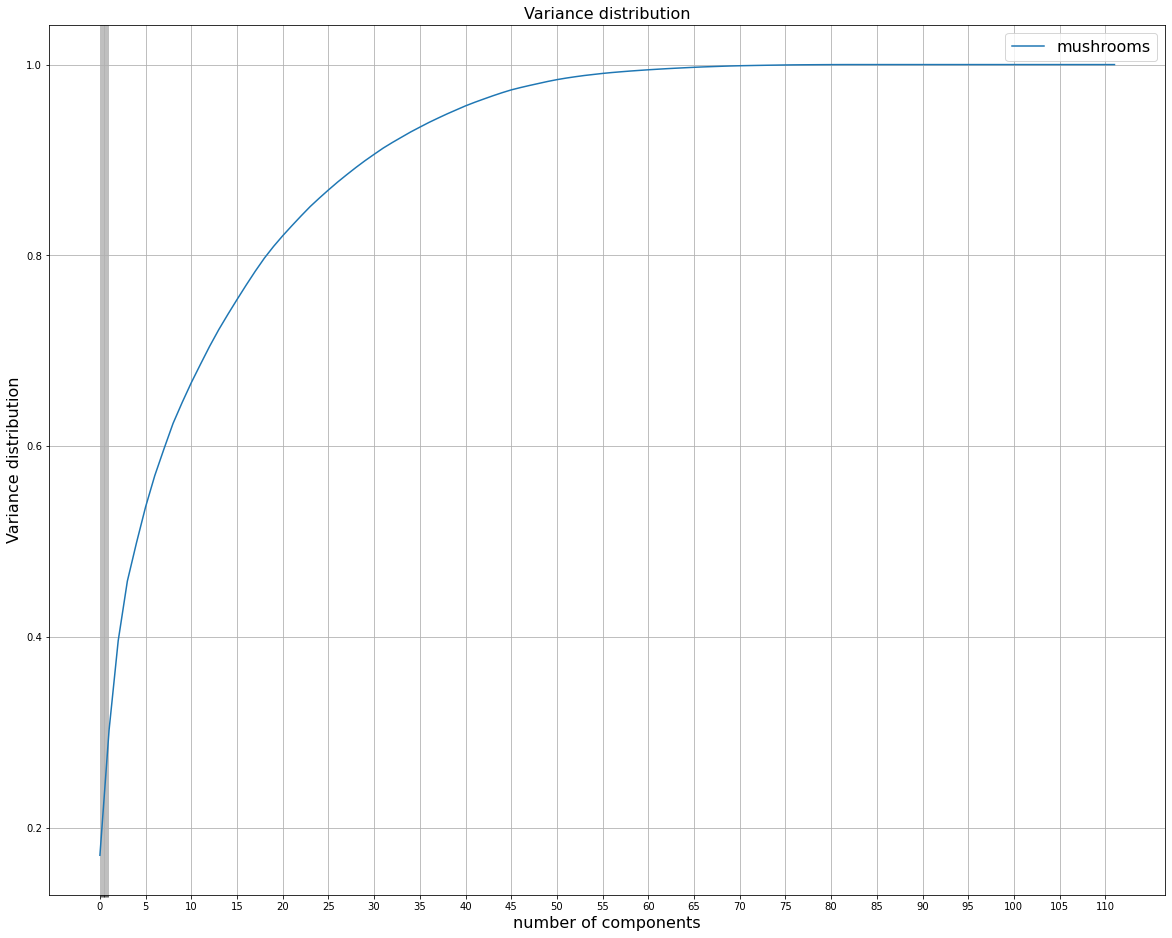

In [59]:
pca = PCA().fit(X_train)

major_ticks = np.arange(0, 112, 5)
minor_ticks = np.arange(0, 1, 0.1) 

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1) 

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')  # set zorder of the grid lines to 1
 
ax.set_title('Variance distribution', fontsize=16) 
ax.plot(np.cumsum(pca.explained_variance_ratio_), label='mushrooms')  # set zorder of the line to 2
ax.set_xlabel('number of components', fontsize=16)
ax.set_ylabel('Variance distribution', fontsize=16)  
ax.legend(fontsize=16) 

plt.show()

## Ну вот из графика видим, что, начиная с 75 компонент,  мы ничего не теряем. Но если мы выберем 75, то ничего не изменится, т.к остальные признаки имеют детерменированное распределение. Поэтому давайте выберем 50 компонент,  сохраняя при этом около 85% 'информации'

Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.

In [60]:
pca = PCA(n_components=75) 
pca.fit(X_train)
X_train_norm = pca.transform(X_train_norm)  
X_test_norm = pca.transform(X_test_norm) 

In [61]:
l1 = l1Regularization(L/1000, 10**4, 1/(L)) 
l2 = l2Regularization(L/1000, 10**4, 1/(L + L/1000)) 

In [62]:
l1.fit(X_train_norm, y_train) 
l2.fit(X_train_norm, y_train)

/tmp/ipykernel_162419/478700918.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  new_w[i] = w[i] - alpha * g[i] - reg * alpha
/tmp/ipykernel_162419/478700918.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  new_w[i] = w[i] - alpha * g[i] + reg * alpha


In [63]:
accuracy_history_l11 = []  
for i in range(100, len(l1.w_history), 100): 
    y_pred = np.dot(X_test_norm, l1.w_history[i]) 
    for j in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[j] - 1) <= np.absolute(y_pred[j] - 2)): 
            y_pred[j] = 1 
        else: 
            y_pred[j] = 2
    accuracy_history_l11.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

In [64]:
accuracy_history_l22 = []  
for i in range(100, len(l2.w_history), 100): 
    y_pred = np.dot(X_test_norm, l2.w_history[i]) 
    for j in range(y_pred.shape[0]): 
        if(np.absolute(y_pred[j] - 1) <= np.absolute(y_pred[j] - 2)): 
            y_pred[j] = 1 
        else: 
            y_pred[j] = 2
            
    accuracy_history_l22.append((np.sum(y_pred == y_test))/y_test.shape[0]) 

/tmp/ipykernel_162419/4264314926.py:3: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(range(len(l1.converges_history)), np.log(l1.converges_history), label='l1 regularization')
/tmp/ipykernel_162419/4264314926.py:4: RuntimeWarning: divide by zero encountered in log
  ax[0].plot(range(len(l2.converges_history)), np.log(l2.converges_history), label='l2 regularization')
/tmp/ipykernel_162419/4264314926.py:20: RuntimeWarning: divide by zero encountered in log
  ax[2].plot(l1.time_history, np.log(l1.converges_history), label='l1 regularization accuracy')
/tmp/ipykernel_162419/4264314926.py:21: RuntimeWarning: divide by zero encountered in log
  ax[2].plot(l1.time_history, np.log(l2.converges_history), label='l2 regularization accuracy')


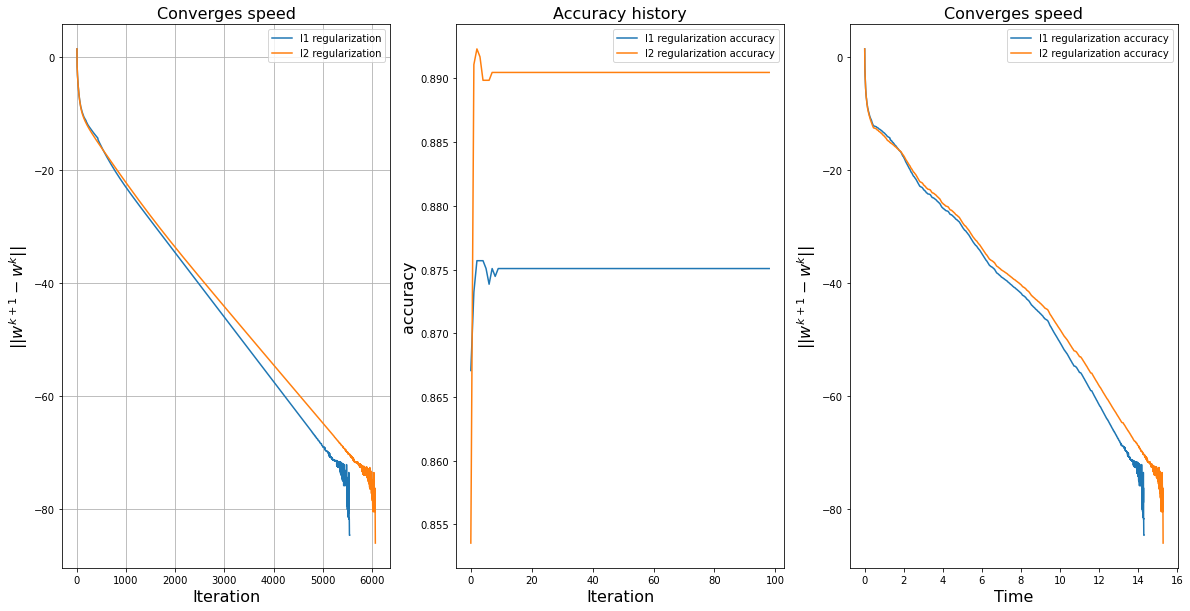

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

ax[0].plot(range(len(l1.converges_history)), np.log(l1.converges_history), label='l1 regularization')  
ax[0].plot(range(len(l2.converges_history)), np.log(l2.converges_history), label='l2 regularization')  
#ax[0].plot(range(len(l0.converges_history)), np.log(l0.converges_history), label='l0 regularization')  
ax[0].set_title('Converges speed', fontsize=16)  
ax[0].set_xlabel('Iteration', fontsize=16) 
ax[0].set_ylabel(r'$||w^{k + 1} - w^{k}||$', fontsize=16)  
ax[0].legend()
ax[0].grid() 

ax[1].plot(range(len(accuracy_history_l11)), accuracy_history_l11, label='l1 regularization accuracy') 
ax[1].plot(range(len(accuracy_history_l22)), accuracy_history_l22, label='l2 regularization accuracy')  
#ax[1].plot(range(len(accuracy_history_l0)), accuracy_history_l0, label='l0 regularization')  
ax[1].set_title('Accuracy history', fontsize=16)  
ax[1].set_xlabel('Iteration', fontsize=16) 
ax[1].set_ylabel('accuracy', fontsize=16)    
ax[1].legend()

ax[2].plot(l1.time_history, np.log(l1.converges_history), label='l1 regularization accuracy') 
ax[2].plot(l1.time_history, np.log(l2.converges_history), label='l2 regularization accuracy')  
#ax[1].plot(range(len(accuracy_history_l0)), accuracy_history_l0, label='l0 regularization')  
ax[2].set_title('Converges speed', fontsize=16)  
ax[2].set_xlabel('Time', fontsize=16) 
ax[2].set_ylabel(r'$||w^{k + 1} - w^{k}||$', fontsize=16)    

ax[2].legend()

# Видим, что точность ухудшилась, но оно и понятно, мы потеряли какую-то информацию, тем самы пожертвовав, точностью, но если посмотреть на сходимости, то мы стали гораздо быстрее сходится, просто потому, что мы уменьшили размерность матрицы!